# 使用Pillow來進行圖像處理

學習如何使用Python的Pillow函式庫來處理圖像。

![](https://pbs.twimg.com/profile_images/510760404411109380/wDGjWJxk.png)

## 介紹

Pillow是Python圖像處理函式庫（PIL）的一個分支。 PIL是一個函式庫，提供了幾個操作圖像的標準程序。它是一個功能強大的函式庫，但自2011年以來就沒有太多的更新，並且不支持Python 3。

Pillow在PIL的基礎下，為Python 3增加了更多功能和支持。它支持一系列圖像文件格式，如PNG，JPEG，PPM ，GIF，TIFF和BMP。我們將看到如何在圖像上執行各種操作，例如剪裁，調整大小，添加文本到圖像，旋轉，灰階轉換。

Ps. 我喜歡OpenCV的速度與強大的圖像處理功能，但是要在OpenCV中使用我們自己喜歡的字體似乎並不容易(預設的字體實在是....令人退三歩呀!)

### 需求

- [Python 3.5](https://www.python.org/)
- [Pillow](https://opencv.org/)

### 安裝

```
pip install Pillow
```

### 下載測試用圖像
1. 下載 [hugh_jackman](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS951IBXqPKs9tME7Le2V3yjPEYcRcLyovCgyu4xdKmDUA5Eye2) 到'data/'的子目錄中並命名為`hugh_jackman.jpg`。
2. 下載 [thumpup](https://www.csudh.edu/Assets/CSUDH-Sites/Social-Work/images/Facebook-ThumbsUp.png) 到'data/'的子目錄中並命名為`thumbup.png`。
### 專案的檔案路徑佈局
   
你的目錄結構看起來像這樣: (這裡只列出來在這個範例會用到的相關檔案與目錄)
```
pillow-demo/
├── xxxx.ipynb
└── data/
    ├── hugh_jackman.jpg
    └── thumbup.png                       

```

#### 載入相關函式庫

In [1]:
# 把一些警告的訊息暫時関掉
import warnings
warnings.filterwarnings('ignore')

# Utilities相關函式庫
import os

# 圖像處理/展現的相關函式庫
import matplotlib.pyplot as plt

#### 設定相關設定與參數

In [2]:
# 專案的根目錄路徑
ROOT_DIR = os.getcwd()

# 訓練/驗證用的資料目錄
DATA_PATH = os.path.join(ROOT_DIR, "data")

# 測試用圖像
TEST_IMAGE = os.path.join(DATA_PATH, "hugh_jackman.jpg")

## 圖像物件 `Image`


Python Imaging Library中的一個關鍵類別是`Image`, 它定義在`Image`模組中。，這個類別的一個實例可以通過幾種方式來創建：從圖像檔案加載圖像，從頭開始創建圖像或者處理其他圖像。

我們將看到所有這些的使用方式。

要從圖像檔案加載圖像，我們使用Image模塊中的open（）函數將路徑傳遞給圖像類別。

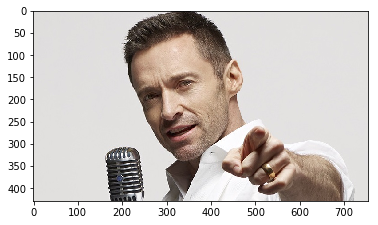

In [3]:
from PIL import Image

# 載入圖像檔
image = Image.open(TEST_IMAGE)

# 儲存圖像檔並轉換格式(jpg -> png)
image.save(os.path.join(DATA_PATH, "new_image.png"))

plt.imshow(image); plt.show()

上面的程式碼創建一個加載了圖像檔案的`Image`類別的實例，並將其保存到一個新文件new_image.png。`Pillow`看到文件擴展名已被指定為PNG，所以它將其轉換為PNG，然後將其保存到文件。

你也可以提供第二個參數save（）來直接指定文件格式。這個image.save（'new_image.png'，'PNG'）將和前面的save（）一樣。 通常沒有必要提供第二個參數，因為Pillow將從文件擴展名中決定使用的文件存儲格式。

## 調整圖像大小

要調整圖像大小，可以調用resize（）方法，傳遞一個兩個整數的`tuple`參數，表示調整大小的圖像的寬度和高度。該函數不會修改使用的圖像，而是返回具有新維度的另一個圖像。

原本圖像大小:  (755, 429)
新的圖像大小:  (400, 400)


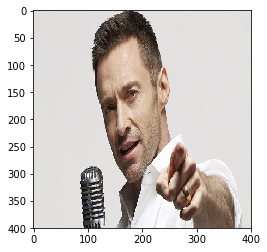

In [4]:
# 載入圖像檔
image = Image.open(TEST_IMAGE)

# 調整大小
new_image = image.resize((400, 400))

print('原本圖像大小: ', image.size)
print('新的圖像大小: ', new_image.size)

plt.imshow(new_image); plt.show()

`resize（）`方法返回一個圖像，其寬度和高度完全匹配傳入的值。這可能是你想要的，但有時你可能會發現這個函數返回的圖像並不理想。這主要是因為該功能沒有考慮到圖像的長寬的比例，所以你最終可能會看到一個圖像，看起來被拉長或擠壓。

你可以從上面的程式碼中看到新創建的圖像：`image_400.jpg`。它看起來有點被擠壓了。

## 圖像縮圖 (thumpnail)

如果要調整圖像大小並保持其長寬的比例，則應該使用thumbnail（）函數來調整它們的大小。這還需要表示縮略圖的最大寬度和最大高度的兩個整數元組參數。

新的縮圖大小:  (400, 227)


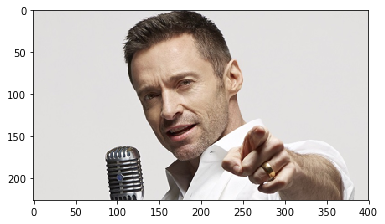

In [5]:
# 載入圖像檔
image = Image.open(TEST_IMAGE)

# 產生縮圖並保持長寬比
image.thumbnail((400, 400))

print('新的縮圖大小: ', image.size)

plt.imshow(image); plt.show()

以上將產生一個圖像大小為(400, 227)，它保持原始圖像的寬高比(755, 429)。正如你可以看到的，這樣的作法會讓縮放的結果比較正常。

ps.請注意在PIL的Image.size回傳的是 __(width, height)__ 與一般使用OpenCV所回傳的 __(height, width, channels)__ 的資訊不太一樣喔!

## 圖像裁剪 (cropping)

裁切圖像時，圖像內的矩形區域將被選中並保留，而區域外的所有其他區域都將被移除。使用`Pillow`庫，可以使用`Image`類的`crop（）`方法裁剪圖像。該方法採用一個邊界框(`bounding box`)來定義裁剪區域的位置和大小，並返回一個代表裁剪圖像的`Image`對象。框的坐標是(left, upper, right, lower)或（x1, y1, x2, y2）。

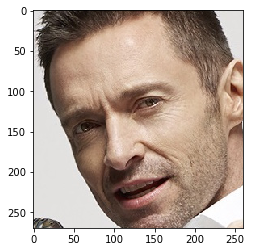

In [6]:
# 載入圖像檔
image = Image.open(TEST_IMAGE)

# 定義要裁剪的邊界框座標
x1 = 200; y1 = 50
x2 = 460; y2 = 320
bbox = (x1, y1, x2, y2)

# 進行裁剪
cropped_image = image.crop(bbox)

plt.imshow(cropped_image); plt.show()

## 將圖像粘貼到另一個圖像上

`Pillow`函式庫能夠將圖像粘貼到另一個圖像上。一些使用案例是通過在其圖像添加水印來保護公開可用的圖像，或是添加公司商標。

使用`paste（）`函數完成粘貼的動作。這個動作修改了`Image`對象，它不像我們目前看到的其他處理函數返回一個新的Image對象。因此，在執行粘貼之前，我們將首先複製我們的原始圖像，以便我們可以用未修改的圖像繼續處理其他處理。

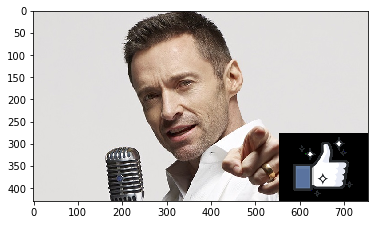

In [7]:
# 載入圖像檔
image = Image.open(TEST_IMAGE)

# 載入浮水印圖像檔
logo = Image.open(os.path.join(DATA_PATH, "thumbup.png"))

# 修改成合適大小
logo.thumbnail((200, 200))

# 複製圖像
image_copy = image.copy()

# 指定要粘貼的左上角座標
position = ((image_copy.width - logo.width), (image_copy.height - logo.height))

# 進行粘貼
image_copy.paste(logo, position)

plt.imshow(image_copy); plt.show()

在上面，我們加載兩個圖像Hugh_Jackman.jpg和brain.png，然後用copy（）複製前者。我們希望將徽標圖像粘貼到復制的圖像上，我們希望將其放置在右下角，結果如上所示。

但是結果跟我們期待的有一些差異, 那個粘貼上來的圖像的背景讓整個結果一整個low掉。

預設的情況下，當你執行粘貼時，透明像素將被粘貼為實心像素，因此徽標周圍的黑色（某些操作系統上的白色）框會被粘貼進去。大多數時候，這不是你想要的。你不能讓你的水印覆蓋底層圖像的內容。我們寧願透明的像素出現。

為了達到這個目的，你需要把第三個參數傳遞給`paste（）`函數。這個參數是透明度掩碼/遮罩圖像物件對象。蒙版是一個圖像對象，其中的`alpha`值是重要的，但其綠色，紅色和藍色值將被忽略。如果給出遮罩，則`paste（）`僅更新由掩碼指示的區域。您可以使用1，L或RGBA圖像作為遮罩。粘貼RGBA圖像並將其用作遮罩將粘貼圖像的不透明部分，但不粘貼透明背景。如果您修改粘貼如下所示，您應該有一個透明像素粘貼徽標。

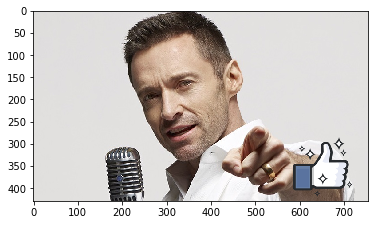

In [8]:
# 載入圖像檔
image = Image.open(TEST_IMAGE)

# 載入浮水印圖像檔
logo = Image.open(os.path.join(DATA_PATH, "thumbup.png"))

# 修改成合適大小
logo.thumbnail((200, 200))

# 複製圖像
image_copy = image.copy()

# 指定要粘貼的左上角座標
position = ((image_copy.width - logo.width), (image_copy.height - logo.height))

image_copy.paste(logo, position, logo) # <-- 就是這裡啦! 你棒棒!!

plt.imshow(image_copy); plt.show()

## 圖像旋轉 (Rotating)

你可以使用`rotate（）`方法逆時鐘地旋轉圖像。這需要一個整數或浮點型參數來表示旋轉圖像的角度，並返迴旋轉圖像的新`Image`對象。

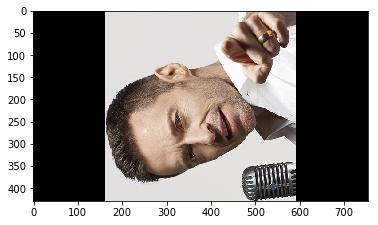

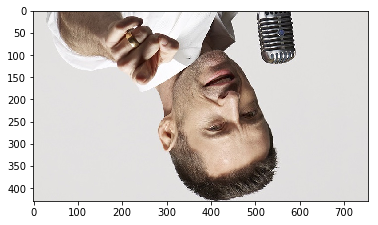

In [9]:
# 載入圖像檔
image = Image.open(TEST_IMAGE)

# 逆時鐘地旋轉圖像90度
image_rot_90 = image.rotate(90)

plt.imshow(image_rot_90); plt.show()

# 逆時鐘地旋轉圖像180度
image_rot_180 = image.rotate(180)

plt.imshow(image_rot_180); plt.show()

在上面，我們將兩張圖像保存到磁盤上：一個以90度旋轉，另一個以180度旋轉。

預設的情況下，旋轉的圖像會保持原始圖像的尺寸。這意味著，除了180的倍數以外的角度，圖像將被剪切和/或填充以適應原始尺寸。如果仔細觀察上面的第一張圖片，您會注意到其中一些已經被剪裁以適合原始圖像的高度，並且其邊緣已經用黑色背景（某些操作系統上的透明像素）填充以適應原始寬度。

下面的例子更清楚地展示了這一點。

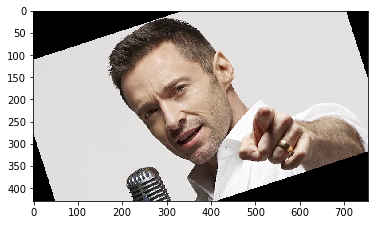

In [10]:
# 載入圖像檔
image = Image.open(TEST_IMAGE)

# 逆時鐘地旋轉圖像18度
image_rot_18 = image.rotate(18)

plt.imshow(image_rot_18); plt.show()

要擴展讓旋轉圖像的尺寸以適應整個圖像，可以將第二個參數傳遞給`rotate（）`，如下所示。

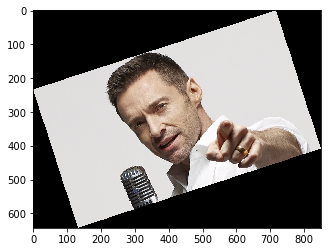

In [11]:
# 載入圖像檔
image = Image.open(TEST_IMAGE)

# 逆時鐘地旋轉圖像18度並讓圖像擴大來包含新的圖像
image_rot_18_expand = image.rotate(18, expand=True)

plt.imshow(image_rot_18_expand); plt.show()

現在圖像的內容將完全可見，並且圖像的尺寸將會增加以解決這個問題。

## 圖像翻轉 (Flipping)

你也可以翻轉圖像來獲得他們的鏡像版本。這是用`transpose（）`函數完成的。你可以採用以下選項：

* PIL.Image.FLIP_LEFT_RIGHT
* PIL.Image.FLIP_TOP_BOTTOM
* PIL.Image.ROTATE_90
* PIL.Image.ROTATE_180
* PIL.Image.ROTATE_270
* PIL.Image.TRANSPOSE

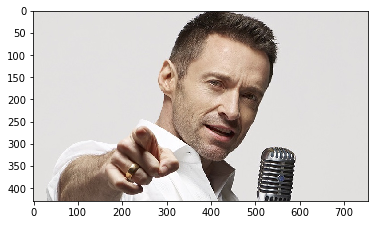

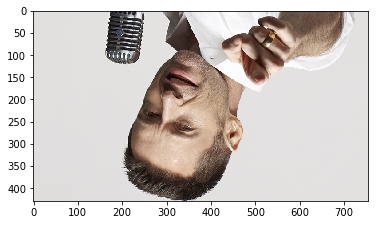

In [12]:
# 載入圖像檔
image = Image.open(TEST_IMAGE)

# 左右互換
image_flip = image.transpose(Image.FLIP_LEFT_RIGHT) 

plt.imshow(image_flip); plt.show()

# 上下互換
image_flip = image.transpose(Image.FLIP_TOP_BOTTOM) 

plt.imshow(image_flip); plt.show()

## 在圖像上繪圖

使用`Pillow`函式庫，你也可以使用`ImageDraw`模組來繪製圖像。您可以繪製直線，點，橢圓，矩形，弧，二元圖，和弦，pieslices，多邊形，形狀和文本。

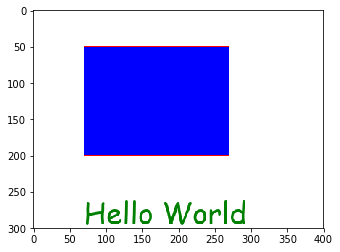

In [13]:
from PIL import Image, ImageDraw, ImageFont

# 產生一個有4個顏色channels的空白圖像
blank_image = Image.new('RGBA', (400, 300), 'white')

 # 在blank_image圖像上繪圖
img_draw = ImageDraw.Draw(blank_image)

# 畫一個矩形
img_draw.rectangle((70, 50, 270, 200), outline='red', fill='blue')

# 取得字型物件
fnt = ImageFont.truetype('comic.ttf', 40) # 修改你電腦上有的字型

# 放上文字訊息到圖像上
img_draw.text((70, 250), 'Hello World', font=fnt, fill='green')

plt.imshow(blank_image); plt.show()

在這個例子中，我們用`new（）`方法創建一個`Image`對象。這將返回一個沒有加載圖像的`Image`對象。然後，我們添加一個矩形和一些文本的圖像。

ps. 特別注意的字型的設定, PIL可以支持TrueType和OpenType字體(你必需指定字型的檔案完整目錄, 或是字型檑在作業系統的標準目錄裡!)。

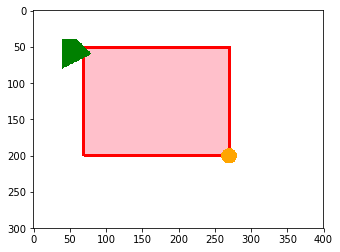

In [14]:
from PIL import Image, ImageDraw, ImageFont

# 產生一個有4個顏色channels的空白圖像
blank_image = Image.new('RGBA', (400, 300), 'white')

img_draw = ImageDraw.Draw(blank_image) # 在blank_image圖像上繪圖

# 在PIL要可以用rectangle來劃一個四方形, 但是無法控制框線的粗細
img_draw.rectangle((70, 50, 270, 200), outline= None, fill='pink')

# 透過畫線來畫一個四方框的框線並控制粗細
img_draw.line([(70,50),(270,50),(270,200),(70,200),(70,50)], fill='red', width=4)

# 在PIL要畫一個可以控制大小的圖要透過以下的手法
r = 10 # 設定半徑

# 以圖的中心點(x,y)來計算框住圓的邊界框座標[(x1,y1),(x2,y2)]
img_draw.ellipse((270-r,200-r, 270+r, 200+r), fill='orange') 

# 畫一個多邊形
img_draw.polygon([(40, 40), (40, 80), (80, 60), (60, 40)], fill='green', outline=None)

plt.imshow(blank_image); plt.show()

## 顏色變換


Pillow函式庫允許你使用`convert（）`方法在不同的像素表示之間轉換圖像。它支持L（灰度），RGB和CMYK模式之間的轉換。

在下面的例子中，我們將圖像從RGBA轉換為L模式，這將彩色圖像轉換成灰階圖像。

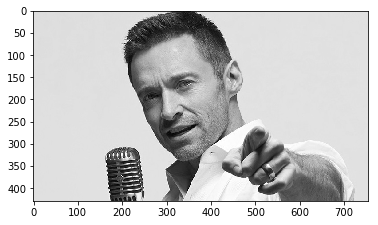

In [15]:
# 載入圖像檔
image = Image.open(TEST_IMAGE)

# 將彩色轉換成灰階
greyscale_image = image.convert('L') 

# 注意要註明cmat='gray'才能夠正確秀出灰階圖像
plt.imshow(greyscale_image, cmap='gray') 
plt.show()

## 參考:
* [Image Processing in Python with Pillow](https://auth0.com/blog/image-processing-in-python-with-pillow/)
* [Pillow說明文件](https://pillow.readthedocs.io)